# Brightness and Contrast

Other tools to explore images are changing the brightness and contrast for temporarily highlighting some objects.

Brightness is an image attribute that represents how much light a source (in this case the image) is emitting.

Contrast refers to the difference of luminance in a image.

Both can be changed with or without changing pixel values. In the context of image analysis, we most often prefer to keep the original values.

# Changing Brightness

Let's open the cells image and change its brightness.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.io import imread
from skimage.exposure import histogram
import napari
from napari.utils import nbscreenshot

In [2]:
image_path = '../data/mitosis_mod.tif'
image_cells = imread(image_path)

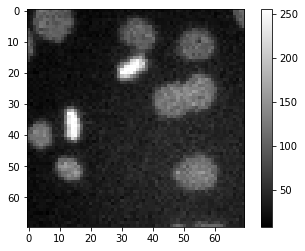

In [3]:
plt.imshow(image_cells, cmap='gray')
plt.colorbar()

Notice that here the colorbar goes from a positive small value up to 255! The matplotlib `plt.imshow()` function adjusts the image contrast to the minimal and maximal values.

The minimal and maximal pixel values can be obtained like this:

In [4]:
min_value = image_cells.min()
max_value = image_cells.max()
print('min value = ', min_value)
print('max value = ', max_value)

min value =  8
max value =  255


If we want to increase brightness, i.e., the perception that the image is emitting more light, we can decrease the minimal and maximal range of the colormap intensities by passing values to the arguments `vmin` and `vmax`. Let's show the results side by side with the help of the `plt.subplots` function.

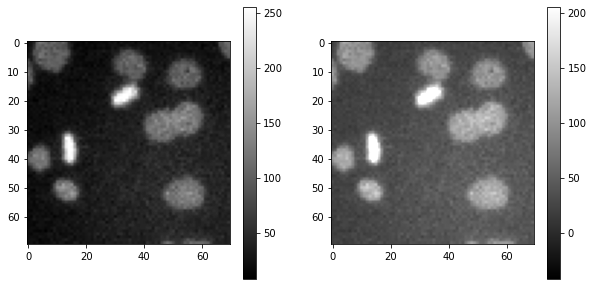

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) # creates a figure with 2 axes for plotting

axes_image0 = ax[0].imshow(image_cells, cmap='gray', vmin = min_value, vmax = max_value) # displays image in the first axis
plt.colorbar(axes_image0, ax=ax[0]) # adds a colorbar to the image in the first axis

axes_image1 = ax[1].imshow(image_cells, cmap='gray', vmin = min_value - 50, vmax = max_value - 50) # display image in the second axis
plt.colorbar(axes_image1, ax=ax[1]) # adds a colorbar to the image in the second axis

Some softwares/viewers such as napari and Fiji have scrollbars that do exactly that.

### Question 1
Did the pixel values change or not? Why?

# Changing Contrast

On the other hand, to increase contrast, we have to narrow down the colormap range of intensities by increasing the minimal value while decreasing the maximal value (usually, but no necessarily, by the same amount).

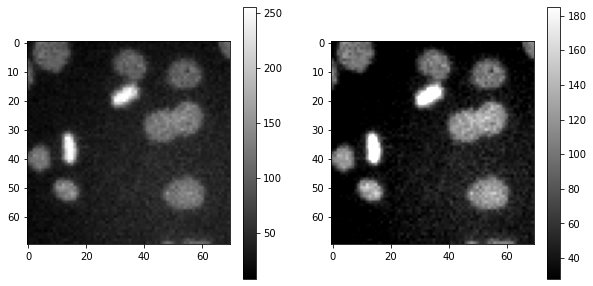

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) # creates a figure with 2 axes for plotting

axes_image0 = ax[0].imshow(image_cells, cmap='gray', vmin = min_value, vmax = max_value) # displays image in the first axis
plt.colorbar(axes_image0, ax=ax[0]) # adds a colorbar to the image in the first axis

axes_image1 = ax[1].imshow(image_cells, cmap='gray', vmin = min_value + 20, vmax = max_value - 70) # display image in the second axis
plt.colorbar(axes_image1, ax=ax[1]) # adds a colorbar to the image in the second axis

# Exercise 1

Below, we make a copy of the image and add a constant value to a copy of the image and display both. Answer the questions below.

In [7]:
image_cells_copy = image_cells.astype('uint16')

In [8]:
image_cells_copy = image_cells_copy + 50

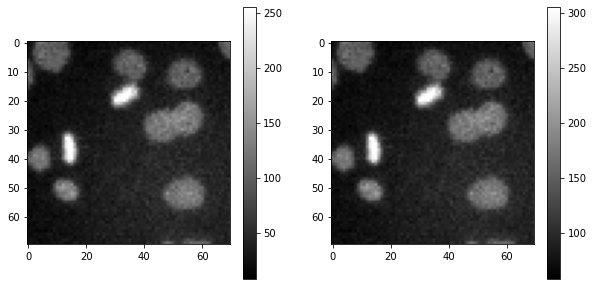

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) # creates a figure with 2 axes for plotting

axes_image0 = ax[0].imshow(image_cells, cmap='gray') # displays image in the first axis
plt.colorbar(axes_image0, ax=ax[0]) # adds a colorbar to the image in the first axis

axes_image1 = ax[1].imshow(image_cells_copy, cmap='gray') # display image in the second axis
plt.colorbar(axes_image1, ax=ax[1]) # adds a colorbar to the image in the second axis

### Question 2

Did we change pixel values now?

Why do we not see the copy image brighter? 

# Exercise 2

Now we open the same images in napari, display them in grid mode and get a screenshot from there. Increase their contrast **in napari**.

In [10]:
viewer = napari.Viewer()

C:\Users\mazo260d\AppData\Roaming\Python\Python39\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [11]:
viewer.add_image(image_cells)
viewer.add_image(image_cells_copy)
viewer.grid.enabled = True

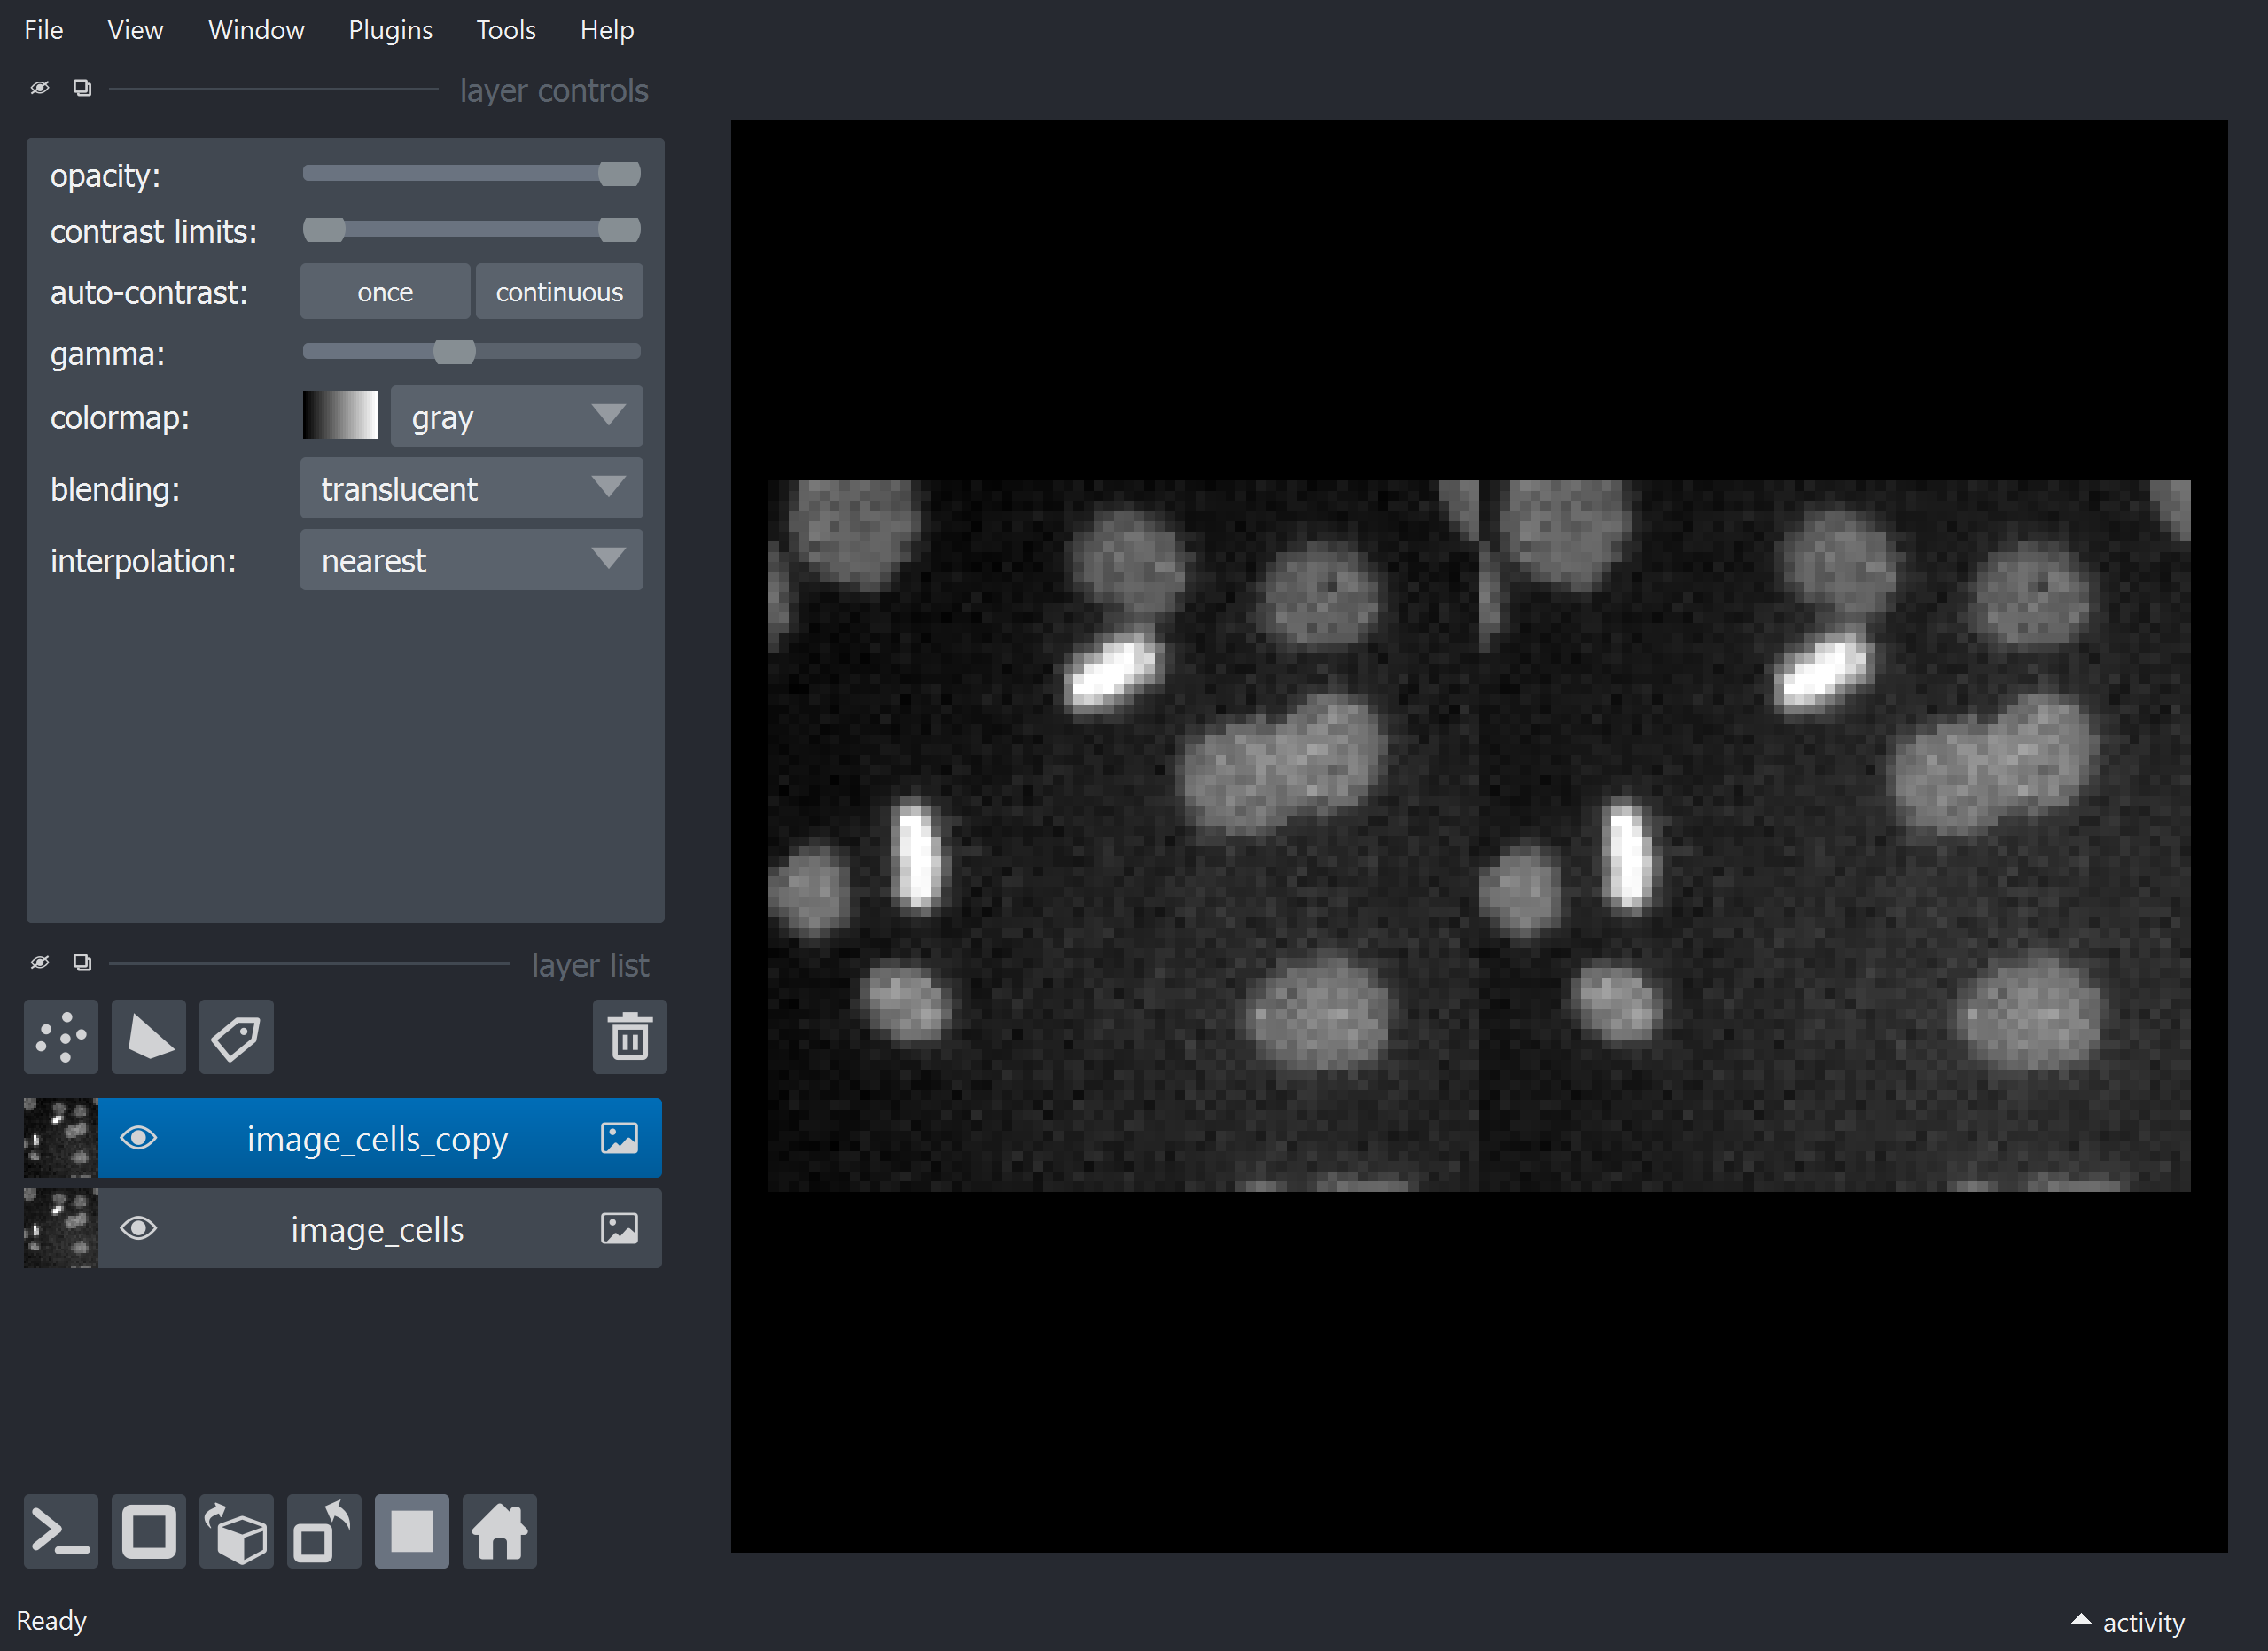

In [12]:
nbscreenshot(viewer)